In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astroquery.sdss import SDSS
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline
################################################################


# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################


# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
#jtplot.style(theme='grade3', context='paper', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

/home/syoshida/.pyenv/versions/3.7.3/lib/python3.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
# Read the data
COLUMNS_GSWLC = ['ObjID', 'GLXID', 'plate', 'MJD', 'fiberID', 'RA', 'Decl', 'z', 'ReducedChiSquared', 'logM', 'logM_error', 'logSFR', 'logSFR_error', 'A_FUV', 'A_FUV_error', 'A_B', 'A_B_error', 'A_V', 'A_V_error', 'flagSED', 'UVsurvey', 'flagUV', 'flagMIDIR', 'flagMGS']
DATA_GSWLC = pd.read_table(PATH_DATA + 'GSWLC-A2.dat.gz.txt', delim_whitespace=True, header=None, names=COLUMNS_GSWLC, comment='#').set_index('ObjID')
print('# of samples = %s'%(len(DATA_GSWLC)))

/home/syoshida/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


# of samples = 640659


In [3]:
DATA_GSWLC = DATA_GSWLC.loc[(DATA_GSWLC['flagSED'] != 5) & (DATA_GSWLC['flagUV'] == 3) & (DATA_GSWLC['logM'] != -99.0) & (DATA_GSWLC['logSFR'] != -99.0)]
print('# of samples = %s'%(len(DATA_GSWLC)))

# of samples = 227012


,GLXID,plate,MJD,fiberID,RA,Decl,z,ReducedChiSquared,logM,logM_error,logSFR,logSFR_error,A_FUV,A_FUV_error,A_B,A_B_error,A_V,A_V_error,flagSED,UVsurvey,flagUV,flagMIDIR,flagMGS
count,2.270120e+05,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.000000,227012.0,227012.0,227012.0,227012.000000,227012.000000
mean,6.370421e+18,1509.267307,53113.050962,322.729763,183.052520,25.005747,0.085647,1.297801,10.358747,0.044588,0.184627,0.097838,1.685497,0.301160,0.465885,0.106713,0.343536,0.090223,0.0,1.0,3.0,2.738842,0.971883
std,1.697260e+17,821.521922,857.767029,186.950516,60.409054,18.857309,0.045446,2.352228,0.660545,0.017782,0.541683,0.060945,0.676352,0.142248,0.243403,0.042545,0.193250,0.038196,0.0,0.0,0.0,2.207767,0.165309
min,2.416606e+18,266.000000,51578.000000,1.000000,0.000686,-11.244275,0.010000,0.000000,7.291000,0.000000,-3.237000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,3.0,0.000000,0.000000
25%,6.374575e+18,838.000000,52376.000000,162.000000,150.763323,9.387304,0.050700,0.290000,9.954000,0.032000,-0.125000,0.069000,1.206000,0.215000,0.286000,0.079000,0.200000,0.064000,0.0,1.0,3.0,1.000000,1.000000
50%,6.377847e+18,1443.000000,53083.000000,322.000000,184.943255,24.169252,0.078600,0.610000,10.450000,0.043000,0.236000,0.087000,1.597500,0.274000,0.422000,0.107000,0.307000,0.090000,0.0,1.0,3.0,2.000000,1.000000
75%,6.379290e+18,2100.000000,53792.000000,482.000000,218.958555,39.367628,0.114100,1.310000,10.852000,0.055000,0.545000,0.110000,2.064000,0.354000,0.597000,0.132000,0.446000,0.114000,0.0,1.0,3.0,2.000000,1.000000
max,6.482723e+18,6064.000000,56107.000000,1000.000000,359.995070,69.498674,0.300000,29.990000,12.080000,0.827000,2.586000,1.170000,6.121000,2.576000,2.553000,0.786000,2.159000,0.625000,0.0,1.0,3.0,7.000000,1.000000


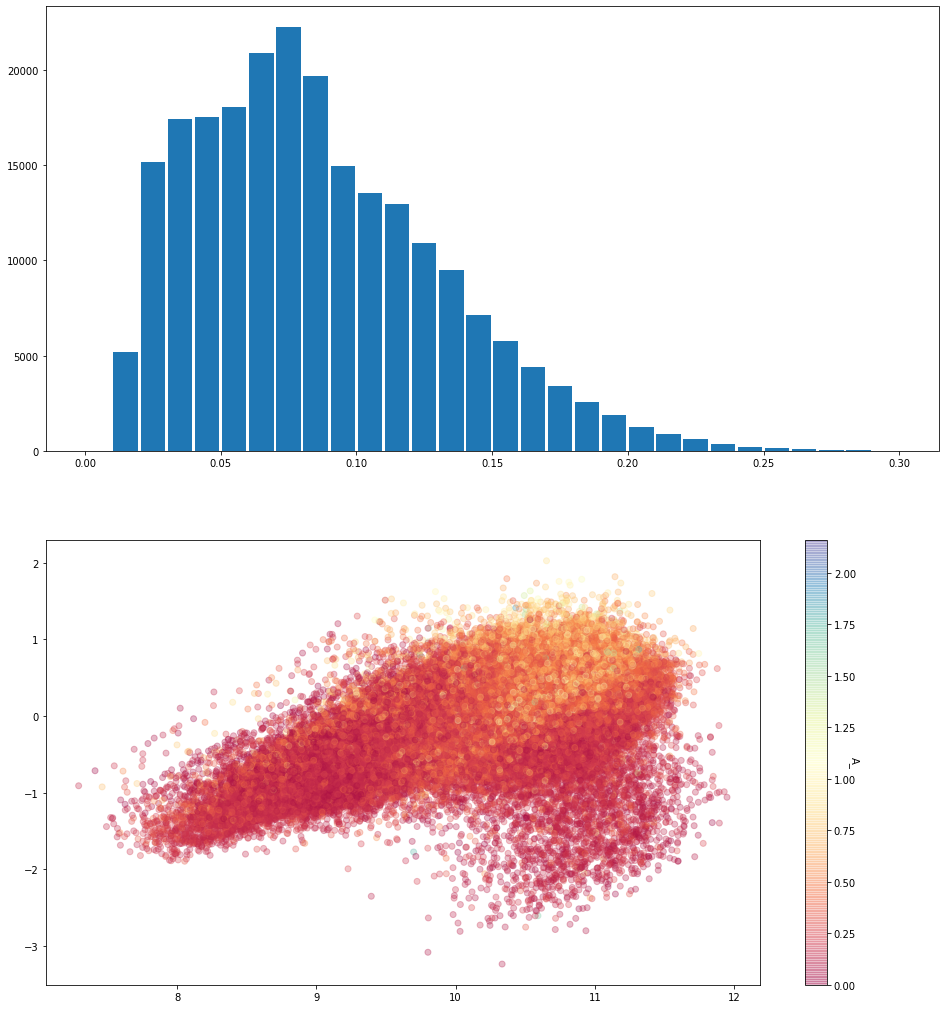

In [9]:
plt.figure(figsize=(16, 18))
plt.subplot(211)
plt.hist(DATA_GSWLC['z'], range=[0, 0.3], bins=30, rwidth=0.9)
plt.subplot(212)
#plt.scatter(DATA_GSWLC['logM'], DATA_GSWLC['logSFR'], alpha=0.3, c=DATA_GSWLC['A_V'], cmap=plt.cm.Spectral)
redshift_r = (0 <= DATA_GSWLC['z']) & (DATA_GSWLC['z'] < 0.1)
plt.scatter(DATA_GSWLC.loc[redshift_r, 'logM'], DATA_GSWLC.loc[redshift_r, 'logSFR'], alpha=0.3, c=DATA_GSWLC.loc[redshift_r, 'A_V'], cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('A_', rotation=270) 
DATA_GSWLC.describe()

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
Initialization converged: True


<BarContainer object of 2 artists>

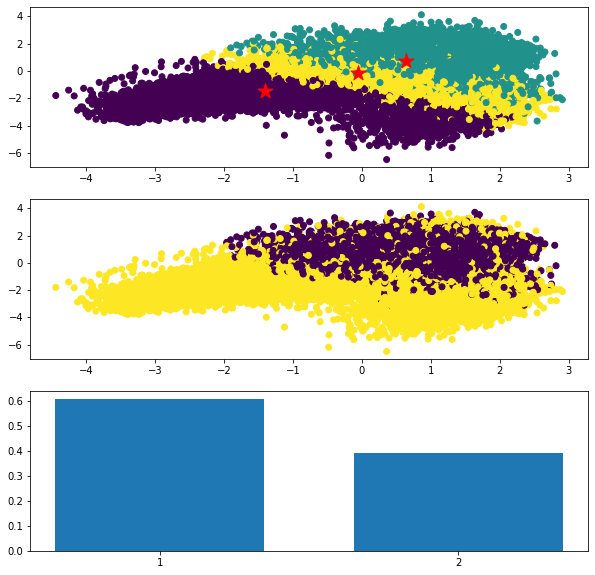

In [10]:
X = DATA_GSWLC.loc[redshift_r, ['logM', 'logSFR', 'z']]

# RobustScaler uses [0.25, 0.75] samples
sc=preprocessing.StandardScaler()
#sc=preprocessing.RobustScaler()
sc.fit(X)
X_norm=sc.transform(X)

plt.figure(figsize=(10,10))
x=X_norm[:,0]
y=X_norm[:,1]

#Execute the K-means
km=cluster.KMeans(n_clusters=3)
z_km=km.fit(X_norm)

# Plot the K-means result
plt.subplot(311)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')

# Execute the VBGMM
vbgm = mixture.BayesianGaussianMixture(n_components=2, covariance_type='full', max_iter=1000, verbose=1)
vbgm=vbgm.fit(X_norm)
labels=vbgm.predict(X_norm)

# Plot the VBGMM result
plt.subplot(312)
plt.scatter(x,y, c=labels)

# Plot the probability distribution calculated by VBGMM
#print(vbgm.weights_)
plt.subplot(313)
x_tick =np.array([1,2])
plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)

In [6]:
X_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))

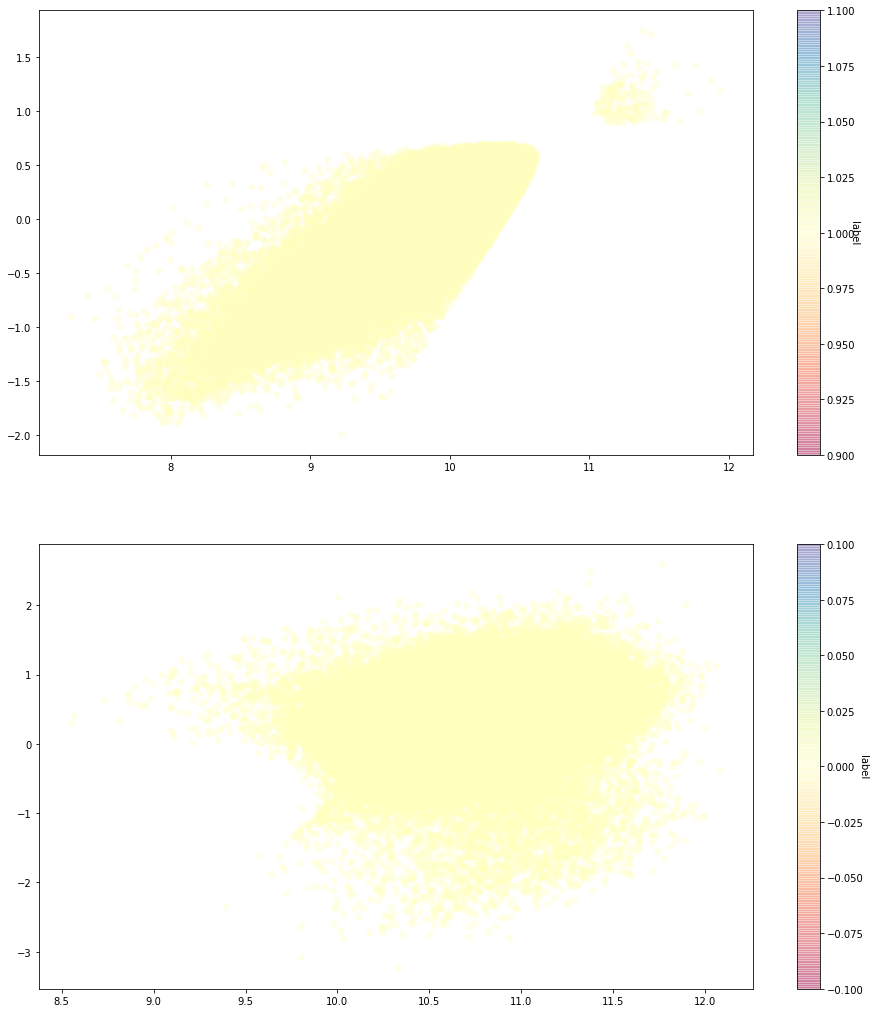

In [7]:
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
plt.scatter(X_plus_label.loc[X_plus_label['label'] != 0, 'logM'], X_plus_label.loc[X_plus_label['label'] != 0, 'logSFR'], alpha=0.3, c=X_plus_label.loc[X_plus_label['label'] != 0, 'label'], cmap=plt.cm.Spectral)
#plt.scatter(X_plus_label['logM'], X_plus_label['logSFR'], alpha=0.3, c=X_plus_label['label'], cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('label', rotation=270) 

ax = fig.add_subplot(212)
plt.scatter(X_plus_label.loc[X_plus_label['label'] == 0, 'logM'], X_plus_label.loc[X_plus_label['label'] == 0, 'logSFR'], alpha=0.3, c=X_plus_label.loc[X_plus_label['label'] == 0, 'label'], cmap=plt.cm.Spectral)
#plt.scatter(X_plus_label['logM'], X_plus_label['logSFR'], alpha=0.3, c=X_plus_label['label'], cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('label', rotation=270) 